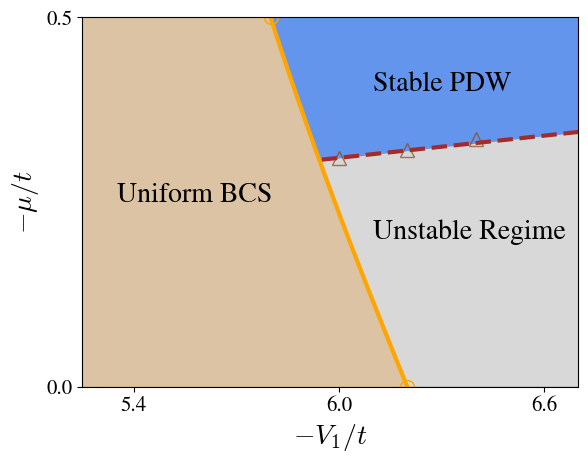

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import CubicSpline

matplotlib.rcParams["mathtext.fontset"]="cm";
matplotlib.rcParams["font.family"]="STIXGeneral";
# Example data points
x = np.array([5.5, 5.6,5.8, 6.2])
y = np.array([1, 0.816,0.5,0 ])

# Create the cubic spline interpolation
cs = CubicSpline(x, y)

x_smooth = np.linspace(min(x), max(x), 100)
plt.xlim([5.25,6.7])
plt.ylim([0,1])
# Plot the original points and the smooth curve
plt.plot(x, y, "o",markersize=10,color="orange",fillstyle="none")
plt.plot(x_smooth, cs(x_smooth), label='First Order Transition',linewidth=3,linestyle="solid",color="orange");

 


boundary1=cs(x_smooth)
fill_xxx=np.arange(5.25,5.51,0.01)
boundaryupper_y=np.concatenate([fill_xxx*0+1.02, boundary1])
boundary_x=np.concatenate([fill_xxx, x_smooth])

plt.fill_between(boundary_x,boundaryupper_y*0, boundaryupper_y,color='tan', alpha=0.8, label='Green Region')



 

####
Triangle_x=np.array([6.0,6.2,6.4])
Triangle_y=np.array([0.31,0.32,0.335])

boundary_N=np.arange(5.95,6.8,0.01)

plt.plot(boundary_N, (boundary_N-6.0)*slope+0.31,color="brown",linestyle="dashed",linewidth=3)
plt.plot(Triangle_x, Triangle_y, '^', label=r"$n_x=0$",markersize=10,alpha=0.7,color="saddlebrown",fillstyle="none")
####




plt.xlabel(r"$-V_1/t$",fontsize=20)

plt.ylabel(r"$-\mu/t$",fontsize=20)

plt.text(5.35,0.25,"Uniform BCS",fontsize=20)

plt.text(6.1,0.4,"Stable PDW",fontsize=20)

plt.text(6.1,0.2,"Unstable Regime",fontsize=20)

plt.xticks([5.4,6.0,6.6],fontsize=15)
plt.yticks([0,0.5],fontsize=15)

#plt.title("Phase Diagram",fontsize=25)
#plt.legend(fontsize=12)


plt.ylim([-0.0,0.5])

Another_xxx=np.linspace(6.2,5.943,100);Partboundary1=cs(Another_xxx);
Lefty=np.concatenate([Partboundary1   ])
merge_x=np.concatenate([Another_xxx   ])
#plt.fill_betweenx(Lefty,merge_x,  merge_x*0+6.75,color='gray', alpha=0.3, label='Green Region')


#plt.fill_between(boundary_N,boundary_N*0+0.3085,   (boundary_N-6.0)*slope+0.31,color='gray', alpha=0.3, label='Green Region')
from scipy.optimize import brentq

# 1) find the intersection x₀ where cs(x)=dashed_line(x)
f = lambda xx: cs(xx) - ((xx-6.0)*slope + 0.31)
x0 = brentq(f, 5.8, 6.2)    # ≃6.0
y0 = cs(x0)

# 2) trace the spline from x₀ down to its zero‐crossing at x=6.2
x_spline = np.linspace(x0, 6.2, 200)
y_spline = cs(x_spline)

# 3) run along the x-axis from x=6.2 out to your right limit (6.75)
x_bot = np.linspace(6.2, 6.75, 100)
y_bot = np.zeros_like(x_bot)

# 4) trace the dashed‐line *back* from x=6.75 to x₀
x_top = np.linspace(6.75, x0, 300)
y_top = (x_top - 6.0) * slope + 0.31

# 5) stitch into one polygon and fill
px = np.concatenate([x_spline, x_bot, x_top])
py = np.concatenate([y_spline, y_bot, y_top])
plt.fill(px, py, color='gray', alpha=0.3, label='Unstable Regime')
#####


Another_xxx=np.linspace(5.91,5.6,100);Partboundary1=cs(Another_xxx);
Lefty=np.concatenate([Partboundary1   ])
merge_x=np.concatenate([Another_xxx   ])
plt.fill_betweenx(Lefty,merge_x,  merge_x*0+6.75,color='cornflowerblue', alpha=1, label='PDW')
boundary_N=np.arange(5.95,6.8,0.01)
#plt.fill_between(boundary_N,  (boundary_N-6)*slope+0.31,boundary_N*0+0.4  ,color='cornflowerblue', alpha=1, label='Green Region')
 
Another_xxx=np.linspace(5.91,5.95,10);Partboundary1=cs(Another_xxx); 
Partboundary1
#plt.fill_between(Another_xxx, Partboundary1,Another_xxx*0+0.4  ,color='cornflowerblue', alpha=1, label='Green Region')
from scipy.optimize import brentq

# ——— 1) find the two corner points ———
#  P0: cs(x) = dashed_line(x)
f0 = lambda xx: cs(xx) - ((xx - 6.0) * slope + 0.31)
x0 = brentq(f0, 5.8, 6.2)
y0 = cs(x0)

#  P1: cs(x) = 0.4
f1 = lambda xx: cs(xx) - 0.4
x1 = brentq(f1, 5.5, 6.2)
y1 = 0.4

#  define your right‐hand x‐limit
x_max = 6.75
y2 = (x_max - 6.0) * slope + 0.31


# ——— 2) parameterize the four edges ———
#   edge 1: along the spline from P0→P1
xx_left  = np.linspace(x0, x1, 200)
yy_left  = cs(xx_left)

#   edge 2: horizontal line from P1→(x_max,y1)
xx_top   = np.linspace(x1, x_max, 200)
yy_top   = np.full_like(xx_top, y1)

#   edge 3: vertical at x_max from (x_max,y1)→(x_max,y2)
xx_vert  = np.array([x_max, x_max])
yy_vert  = np.array([y1,    y2   ])

#   edge 4: dashed line from (x_max,y2)→P0
xx_bot   = np.linspace(x_max, x0, 200)
yy_bot   = (xx_bot - 6.0) * slope + 0.31


# ——— 3) stitch into one closed polygon ———
px = np.concatenate([xx_left, xx_top, xx_vert, xx_bot])
py = np.concatenate([yy_left, yy_top, yy_vert, yy_bot])

plt.fill(px, py,
         color='cornflowerblue', alpha=1,
         label='PDW')


plt.savefig("fig1.pdf", bbox_inches='tight')

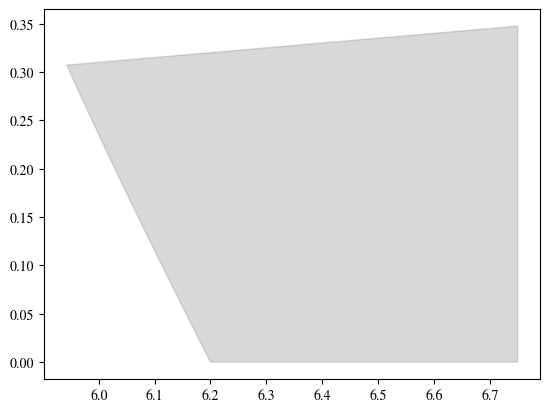

In [3]:
from scipy.optimize import brentq

# 1) find the intersection x₀ where cs(x)=dashed_line(x)
f = lambda xx: cs(xx) - ((xx-6.0)*slope + 0.31)
x0 = brentq(f, 5.8, 6.2)    # ≃6.0
y0 = cs(x0)

# 2) trace the spline from x₀ down to its zero‐crossing at x=6.2
x_spline = np.linspace(x0, 6.2, 200)
y_spline = cs(x_spline)

# 3) run along the x-axis from x=6.2 out to your right limit (6.75)
x_bot = np.linspace(6.2, 6.75, 100)
y_bot = np.zeros_like(x_bot)

# 4) trace the dashed‐line *back* from x=6.75 to x₀
x_top = np.linspace(6.75, x0, 300)
y_top = (x_top - 6.0) * slope + 0.31

# 5) stitch into one polygon and fill
px = np.concatenate([x_spline, x_bot, x_top])
py = np.concatenate([y_spline, y_bot, y_top])
plt.fill(px, py, color='gray', alpha=0.3, label='Unstable Regime')


Slope: 0.049999999999999496
Intercept: 0.010000000000003085


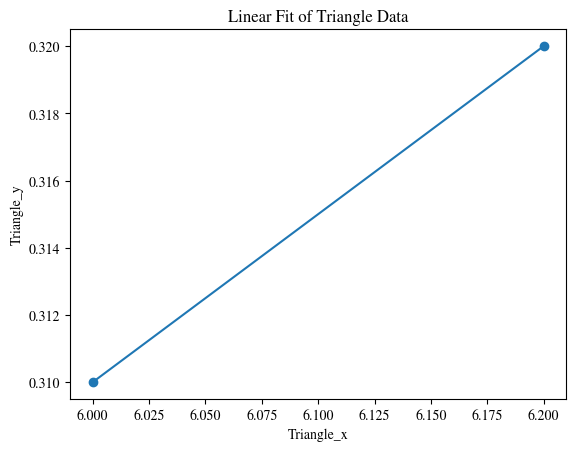

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
Triangle_x = np.array([6.0, 6.2])
Triangle_y = np.array([0.31, 0.32])

# Perform linear fit
slope, intercept = np.polyfit(Triangle_x, Triangle_y, 1)

# Display results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plot data and fit
plt.scatter(Triangle_x, Triangle_y)
plt.plot(Triangle_x, slope * Triangle_x + intercept)
plt.xlabel("Triangle_x")
plt.ylabel("Triangle_y")
plt.title("Linear Fit of Triangle Data")
plt.show()


In [16]:
cs(5.8)

array(0.5)

In [124]:
np.arange(5,5.5,0.01)

array([5.  , 5.01, 5.02, 5.03, 5.04, 5.05, 5.06, 5.07, 5.08, 5.09, 5.1 ,
       5.11, 5.12, 5.13, 5.14, 5.15, 5.16, 5.17, 5.18, 5.19, 5.2 , 5.21,
       5.22, 5.23, 5.24, 5.25, 5.26, 5.27, 5.28, 5.29, 5.3 , 5.31, 5.32,
       5.33, 5.34, 5.35, 5.36, 5.37, 5.38, 5.39, 5.4 , 5.41, 5.42, 5.43,
       5.44, 5.45, 5.46, 5.47, 5.48, 5.49])